# 01.test_odesolve.py  run  result

In [1]:
#
# Test functions for odesolve
#
# The tests here check that the functions defined in odesolve.py produce the
# right outputs. To run the tests make sure that odesolve.py and this file
# test_odesolve.py are in the same directory and then run this file.
#

import numpy as np
from odesolve import euler, rk4, solveto, odesolve


def test_euler():
    def f(x, t):
        return x + t

    assert euler(f, 0, 0, 1) == 0
    assert euler(f, 1, 0, 1) == 2
    assert euler(f, 1, 0, 2) == 3
    assert euler(f, 1, 0, 0.5) == 1.5
    assert euler(f, 0, 1, 1) == 1
    assert euler(f, 1, 1, 1) == 3
    assert euler(f, 1, 1, 2) == 5
    assert euler(f, 1, 1, 0.5) == 2.0


def test_solveto():
    def f(x, t):
        return x

    assert solveto(f, 0, 0, 1, 1) == 0
    assert solveto(f, 1, 0, 1, 1) == 2
    assert solveto(f, 1, 0, 1, 0.5) == 2.25
    assert solveto(f, 1, 0, 1, 0.25) == 2.44140625
    assert solveto(f, 1, 0, 1, 0.3) == 2.4167

    xtrue = 2.71828182845905
    for h in [0.1, 0.01, 0.001, 0.003]:
        xguess = solveto(f, 1, 0, 1, h)
        assert abs(xguess - xtrue) < 2*h

    def f(x, t):
        return x + t

     xtrue = -11
     for h in [0.1, 0.01, 0.001, 0.003, 1e-5]:
         xguess = solveto(f, -2, 1, 10, h)
         assert abs(xguess - xtrue) < 1e-10 / h**0.5


def isclose(x1, x2):
    return abs(x1 - x2) / (abs(x1) + abs(x2)) < 1e-10


def test_rk4():
    def f(x, t):
        return x

    assert rk4(f, 0, 0, 1) == 0
    assert isclose(rk4(f, 1, 0, 1), 2.708333333333333)
    assert isclose(rk4(f, 1, 1, 3), 16.375)


def test_rk4_solveto():
    def f(x, t):
        return x
    xtrue = 2.71828182845905
    for h in [0.1, 0.01, 0.001, 0.003]:
        xguess = solveto(f, 1, 0, 1, h, rk4)
        assert abs(xguess - xtrue) < h**4


def test_arrays():
    def f(X, t):
        x1, x2 = X
        dx1dt = x2
        dx2dt = -x1
        dXdt = [dx1dt, dx2dt]
        return np.array(dXdt)

    X0 = np.array([1, -1])
    assert np.allclose(euler(f, X0, 0, 1), np.array([0, -2]))
    assert np.allclose(rk4(f, X0, 0, 1), np.array([-0.29166667, -1.375]))
    assert np.allclose(solveto(f, X0, 0, 1, 0.25), np.array([-0.30859375, -1.56640625]))
    assert np.allclose(solveto(f, X0, 0, 1, 0.25, rk4), np.array([-0.30112267, -1.38177358]))


def test_odesolve():

    def f(x, t):
        return x

    x0 = [1]
    tvals = np.linspace(0, 1, 5)
    expected_euler = np.array([[1. , 1.28386503, 1.64830942, 2.11620682, 2.71692393]])
    expected_rk4   = np.array([[1. , 1.28402542, 1.64872127, 2.11700002, 2.71828183]])
    guess_euler = odesolve(f, x0, tvals, 0.001, euler)
    guess_rk4   = odesolve(f, x0, tvals, 0.001, rk4)
    assert np.allclose(expected_euler, guess_euler)
    assert np.allclose(expected_rk4, guess_rk4)


test_functions = [
    test_euler,
    test_rk4,
    test_solveto,
    test_rk4_solveto,
    test_arrays,
    test_odesolve,
]


passed = 0
for func in test_functions:
    print('Checking', func.__name__, '...')
    exc = None
    try:
        func()
    except Exception as e:
        print('FAILED')
        failed = True
        exc = e
    else:
        print('PASSED')
        passed += 1
        failed = False

    if failed:
        break

print(passed, 'tests passed out of', len(test_functions), 'tests')

if failed:
    print(func.__name__, 'failed with exception:')
    raise exc from None


Checking test_euler ...
PASSED
Checking test_rk4 ...
PASSED
Checking test_solveto ...
PASSED
Checking test_rk4_solveto ...
PASSED
Checking test_arrays ...
PASSED
Checking test_odesolve ...
PASSED
6 tests passed out of 6 tests


All tests passed!! The function works correctly!!

# 02.Introduction of functions in odesolve.py

+ euler(f, x, t, h)

        f Differential equations that need to be solved
        x inital condition
        t The starting value of the interval
        h stepsize
        return The result of one euler calculation


+ rk4(f, x, t, h)
        f Differential equations that need to be solved
        x inital condition
        t The starting value of the interval
        h stepsize
        return The result of one rk4 calculation
    
    
+ solveto(f, x1, t1, t2, hmax, method=euler)
        f Differential equations that need to be solved
        x inital condition
        t1 The starting value of the interval
        t2 The starting value of the interval
        hmax  max stepsize
        method the calculate metho,default euler
        return The result of calculation with the  given function
    

+ odesolve(f, x0, tvals, h, method=euler)
        f Differential equations that need to be solved
        x0 inital condition 1Dor2D
        tvals The interval
        h  stepsize
        method the calculate metho,default euler
        return The result of calculation with the given function , it will be a np.array 



# 03. plot_odesolve

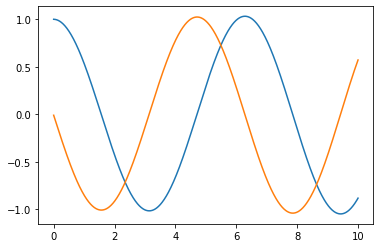

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from odesolve import odesolve


def f(X,t):
    x,y = X
    dxdt = y
    dydt = -x
    return  np.array([dxdt,dydt])

x0 = 1
y0 = 0

X0 = np.array([x0,y0])
h = 0.01
t = np.linspace(0,10,1000)
Xt = odesolve(f,X0,t,h)

plt.plot(t, Xt)
plt.savefig("plot_odesolve.pdf")
plt.show ( )


As the plotting result shows,it's same as the result in the specification.pdf
This shows that the second-order ordinary differential equations also work correctly!

# 04.plot_error

100%|██████████████████████████████████████████████████████████████████████████████████| 37/37 [04:15<00:00,  6.90s/it]


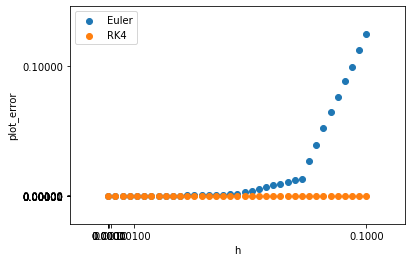

In [5]:
from math import e
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
from tqdm import tqdm
from odesolve import solveto, euler, rk4

a = [0.00001,0.0001,0.001,0.01,0.1]
h_list = list(a)
for item in a[:-1]:
    for i in range(2,10):
        h_list.append(item*i)
h_list.sort()
def f(x,t):
    return x

euler_error =[]
rk4_error =[]

for h in tqdm(h_list):
    euler_error.append(abs(e - solveto(f, 1, 0,1, h,euler)))
    rk4_error.append(abs(e - solveto(f, 1, 0,1, h,rk4)))

harray = np.linspace(0.00001,0.1,len(euler_error))
plt.scatter(harray, euler_error)
plt.scatter(harray, rk4_error)
# Set the x-axis scale
plt.xticks([0,1e-5,1e-4,1e-3,1e-2,1e-1]) 
# Set the y-axis scale
plt.yticks([1e-15,1e-13,1e-11,1e-9,1e-7,1e-5,1e-3,1e-1])
# Set the legend
plt.legend(['Euler','RK4'])
# save
plt.savefig("error.pdf")
# set the x-axis "h"
plt.xlabel('h')
# set the y-axis "plot_error"
plt.ylabel('plot_error')
plt.show()

Due to the different coordinate scale settings, the drawing results are not the same as the pictures in the given document.
However, it can be seen that the accuracy of the rk4 method is much higher than that of the Euler method, especially when the value of the step h is smaller, the more accurate the rk4 square result, but when h is less than 1e-3, the accuracy tends to be stable.
For the Euler method, the same also has a step h the smaller the value, the more accurate the result. When h varies between 0.01 and 0.1, the accuracy varies greatly. Accuracy stabilizes when h is less than 0.01.

# 05.nodus

In this project, the main difficulty lies in the completion of the odesolve function. Since ordinary differential equations of different orders are to be processed, the function is judged, mainly by the dimension of the initial condition. The function is considered a first-order ordinary differential equation when the initial condition is one-dimensional, and when the initial condition is two-dimensional.